#                             Food Environmental Impact

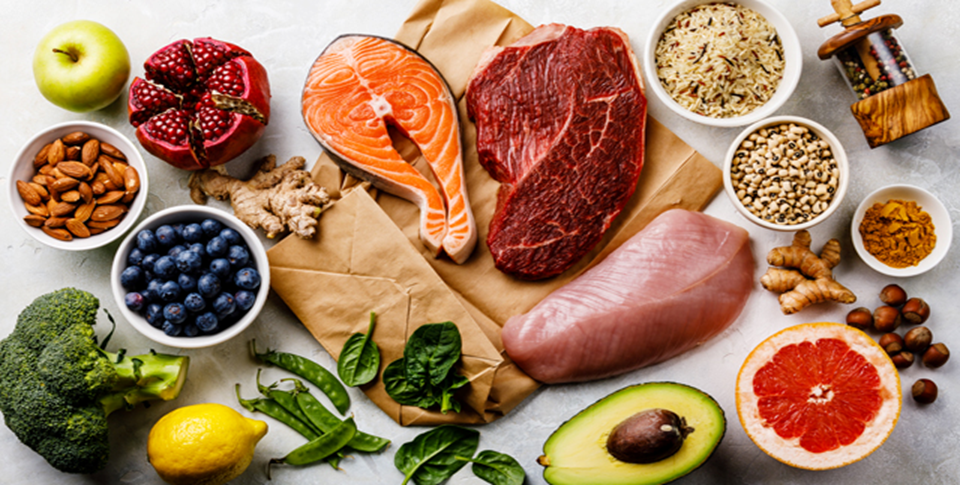

Agriculture is the most important contributor to the environmental changes and as the world’s population has increased, the demand for food, energy and water has increased. In this notebook, we will look at the environmental effects of several food items. The data set can be found [here.](https://www.kaggle.com/selfvivek/environment-impact-of-food-production) 

In the first section of the notbook environmental impacts of production of common food items are presented.  Four metrics are considered to make comparison between food items. These metrics are:

greenhouse gas emissions (kgs of CO2-equivalents): Greenhouse gases are mainly carbon dioxide, nitrous oxide and methane, which are present as CO2 equivalent 

Land use (m2)

freshwater withdrawals (liters) 

eutrophying emissions (grams of PO4-equivalents): Eutrophying emissions represent runoff of excess nutrients into the surrounding environment and waterways, which pollute ecosystems.


Furthermore, we will also look closer to food supply chain, which consists of land usage, farm, animal feed, processing transport and retail and packaging to find out the most influentioal contributor to environmental contamination. 

In the second section effects of our diet on environment is studied. 3 diets are compared: Regualr, Vegan and Vegie. For each diet, 3 meal plans are created and their environmental impacts are compared.

## imports

In [1]:
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = 'C:\\Users\\somfl\\Documents\\GitHub\\SY\\SomayeYoussefi\\Side Projects\\Food\\Food_Production.csv'
df = pd.read_csv(file)
df.set_index('Food product', inplace=True)

In [3]:
missing = pd.DataFrame({'number of missing':df.isna().sum(), 'missing%':df.isna().mean()})
missing                    

,number of missing,missing%
Land use change,0,0.000000
Animal Feed,0,0.000000
Farm,0,0.000000
Processing,0,0.000000
Transport,0,0.000000
Packging,0,0.000000
Retail,0,0.000000
Total_emissions,0,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),10,0.232558
Eutrophying emissions per kilogram (gPO₄eq per kilogram),5,0.116279


The focus of this study is on green house gas emission, land and water use as well as eutrophying emissions. Therefore, we will drop scarecity water columns completely. Furthermore, we will make comparisions based on Kg of food. There are columns based on kcal, and 100 g protein, so we will drop irreleveant columns and will fill the missing values with mean values. It should be noted that there is no missing values in the emission column. Furthermore, there are about 40 common food including beef. lamb, chicken, fish and soybean in this database. 

In [4]:
droplist=['Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)', 'Land use per 1000kcal (m² per 1000kcal)',
'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 
'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Land use per 100g protein (m² per 100g protein)',
'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
'Scarcity-weighted water use per kilogram (liters per kilogram)','Freshwater withdrawals per 100g protein (liters per 100g protein)']

df.drop(columns=droplist, axis=1, inplace=True)

In [5]:
#finding average values of each column
df_mean = df.mean()
# Replacing missing values with average values
df = df.fillna(df_mean)

## 1. Which food has the highest enivironmental impact?

There are four categories that should be included when analyzing the environmental impact of food production. These categories are:

1. greenhouse gas emissions (kgs of CO2-equivalents)

2. Land use

3. freshwater withdrawals (liters)

4. eutrophying emissions (grams of PO4-equivalents)


Greenhouse gas emissions are measured in kilograms of carbon dioxide equivalents (kgCO₂eq) per kilogram of food product. Land use is the area needed to generate food and freshwater is the amount of water used. Eutrophying emissions assess the environmental pollution accompanied by food production as the runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor to environmental pollution. 

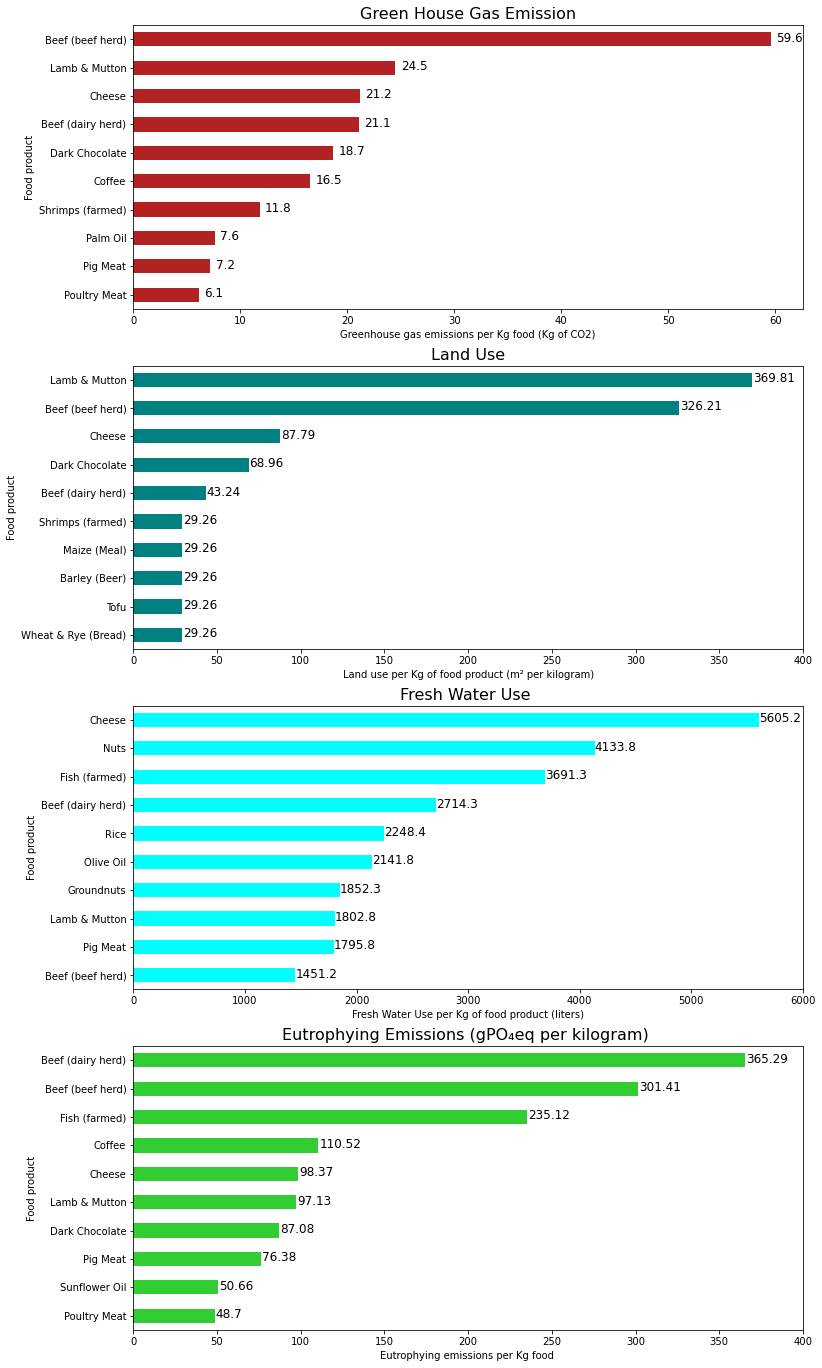

In [6]:
fig, [axes0, axes1, axes2, axes3] = plt.subplots(nrows = 4, ncols = 1, figsize=(12,24))

temp_df= df.dropna().sort_values(by= "Total_emissions", ascending= True).iloc[-10:, df.columns.get_loc('Total_emissions')]
land_df= df.dropna().sort_values(by= 'Land use per kilogram (m² per kilogram)', ascending= True).iloc[-10:, df.columns.get_loc('Land use per kilogram (m² per kilogram)')]
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per kilogram (liters per kilogram)', ascending= True).dropna().iloc[-10:,df.columns.get_loc('Freshwater withdrawals per kilogram (liters per kilogram)')]
Eut_df= df.dropna().sort_values(by= 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', ascending= True).iloc[-10:, df.columns.get_loc('Eutrophying emissions per kilogram (gPO₄eq per kilogram)')]

temp_df.plot(kind='barh', ax= axes0, color='firebrick', grid=False)

land_df.plot(kind='barh',  ax= axes1, color= "#008080", grid=False)

water_df.plot(kind='barh', ax= axes2, color='aqua', grid=False)

Eut_df.plot(kind='barh', ax= axes3, color='limegreen', grid=False)


axes0.set_xlabel("Greenhouse gas emissions per Kg food (Kg of CO2)")
axes0.set_title('Green House Gas Emission', fontsize=16)

axes1.set_xlabel("Land use per Kg of food product (m² per kilogram)")
axes1.set_title('Land Use', fontsize=16)
axes1.set_xlim([0,400])

axes2.set_xlabel("Fresh Water Use per Kg of food product (liters)")
axes2.set_xlim(0,6000)
axes2.set_title("Fresh Water Use ", fontsize=16)

axes3.set_xlabel("Eutrophying emissions per Kg food ")
axes3.set_xlim(0,400)
axes3.set_title("Eutrophying Emissions (gPO₄eq per kilogram) ", fontsize=16)


p = axes0.patches
for i in range(len(p)):
    x1, y1 = p[i].get_xy()
    w = p[i].get_width()
    a = w
    axes0.text(w+.5, y1+p[i].get_height()/3, round(a,2), rotation=0, fontsize=12)    
   
p = axes1.patches
for i in range(len(p)):
    x1, y1 = p[i].get_xy()
    w = p[i].get_width()
    a = w
    axes1.text(w+.5, y1+p[i].get_height()/3, round(a,2), rotation=0, fontsize=12) 
    
p = axes2.patches
for i in range(len(p)):
    x1, y1 = p[i].get_xy()
    w = p[i].get_width()
    a = w
    axes2.text(w+.5, y1+p[i].get_height()/3, round(a,2), rotation=0, fontsize=12) 
    
p = axes3.patches
for i in range(len(p)):
    x1, y1 = p[i].get_xy()
    w = p[i].get_width()
    a = w
    axes3.text(w+.5, y1+p[i].get_height()/3, round(a,2), rotation=0, fontsize=12) 

It can be understood from the plots that: 

Green house gas emission: Among common foods, beef (beef herd) has the highest amount of green house gas emission. Production of 1 Kg of beef resulted in 59.6 Kg CO2, which is significantly higher than any other products. Lamb & mutan (24.5 Kg CO2) and cheese (21.2 Kg CO2) are in the second and third places. Furthermore, beef, lamb and cheese also need the highest area of land. 

Land use: production of 1 Kg of lamb & mutan (369.81 m2) and beef (326.11) need significantly higher land area, followed by cheese (87.89 m2)

Fresh water use (liters): cheese, nuts fish are the most water demanding food items. Production of 1 Kg cheese, nuts and fish requires 5605.2, 4133.8 and 3691.3 liters of fresh water, respectively.

Eutrophying emissions: beef followed by fish are the most contaminating food products. Production of 1 Kg of beef (dairy herd), 1 Kg of beef (beef herd) and 1 Kg of fish results in emission of 365.29, 301.41 and 235.12  g of equvalent phosphate, respectively.

Other animal meat sources like pig and polutary also are among 10 unfriendly food items.

Coffee, which is a common drink every where is in the six place in green house gas emissions. 


## 2. What stages of supply chain contributes most to the green house gas emission?

There are 7 manin stages in the food production chain, these stages are:
1. Land usage

2. Farm

3. Animal Feed

4. Processing

5. Transport

6. Retail

7. Packaging


[A survey](https://nielseniq.com/global/en/insights/analysis/2019/what-food-related-causes-do-us-consumers-care-about-today/) done in 2017,  found 46 percent of people surveyed believed it was important to buy local foods. To find out what stage contribues most to green house gas emissions, the stacked bar chart is shown below. As it is shown, for most of food items _farming_ is the greatest contributors to the green house gas emission and  _transportation_ is not a big contributor to GHG emissions. So, it does not really matter if we buy local products, what we eat is still more influential than where the product is coming from. Buying locally may strengthen local businesses, however, it is not the most environmental friendly approch when it comes to food.

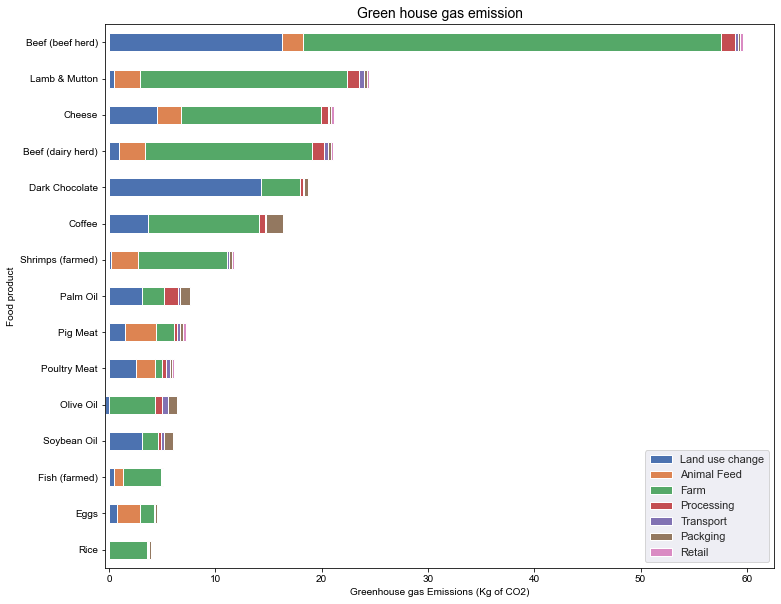

In [8]:
temp_df= df.sort_values(by= "Total_emissions", ascending= True).iloc[-15:,:7]


fig, ax = plt.subplots(figsize=(12,10))
sns.set()
temp_df.plot(kind='barh', stacked=True, ax= ax, grid=False)
plt.xlabel("Greenhouse gas Emissions (Kg of CO2)")
plt.title('Green house gas emission', fontsize=14)
plt.show()

## 3. Is your diet negatively impacting the environment ?

There are 3 diets that we looked into; regular, vegan and vegiterian. In a regular diet, there is no restrictions on the use of animal meat or other animal products. A vegetarian diet eliminates meat, poultry, and fish in favor of plant-based foods and in a vegan diet, there is no room for any animal products. 

I have designed 3 meals in each diet category. These meals are similar with respect to their macro nutrients; they all have about 100 g protein, 70 g fat and 150 carbs resulting in about 1700 calories. 

First regular meal plan, Regular 1, has beef (beef herd), cheese and pork as protein sources. Regular 2 is similar to Regular 1 except that the beef is from dairy herd. In Regular 3 poulatry, cheese and lamb  are protein sources.
Vegie 1, has seefood and dairy products (milk, cheese and egg). Vegie 2 has only seefood and Vegie 3 has seafood and eggs. In all Vegan meal plans, the main source of protein is soy (tofu and/or soy milk) with different combination of hydrocarbons, fruits, vegetables and fat sources. 

A bar plot that summarizes micro nutrient in meals is shown, followed by 9 subplots showing a comprehensive composition of the meals.

In [13]:
# Loading the meal plan excel sheet

path = "C:\\Users\\somfl\\Documents\\GitHub\\SY\\SomayeYoussefi\\Side Projects\\Food\\meal_plan.xlsx"
MealPlan = pd.read_excel(path)
MealPlan.set_index('Entity', inplace=True)

# the last four rows summarize the meal plan and are saved in  a separate dataframe.
Summary = MealPlan.loc['calorie':,:]
MealPlan = MealPlan.loc[:'Olive Oil',:]

The composision of the meal plans are shown below.

Text(0, 0.5, ' Quantity (g)')

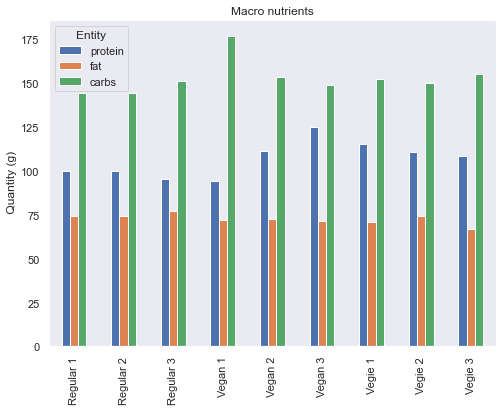

In [15]:
fig, ax=plt.subplots()
Summary.loc['protein':,:].T.plot(kind='bar', grid=False, figsize=(8,6), ax = ax)
ax.set_title('Macro nutrients')
ax.set_ylabel(' Quantity (g)')

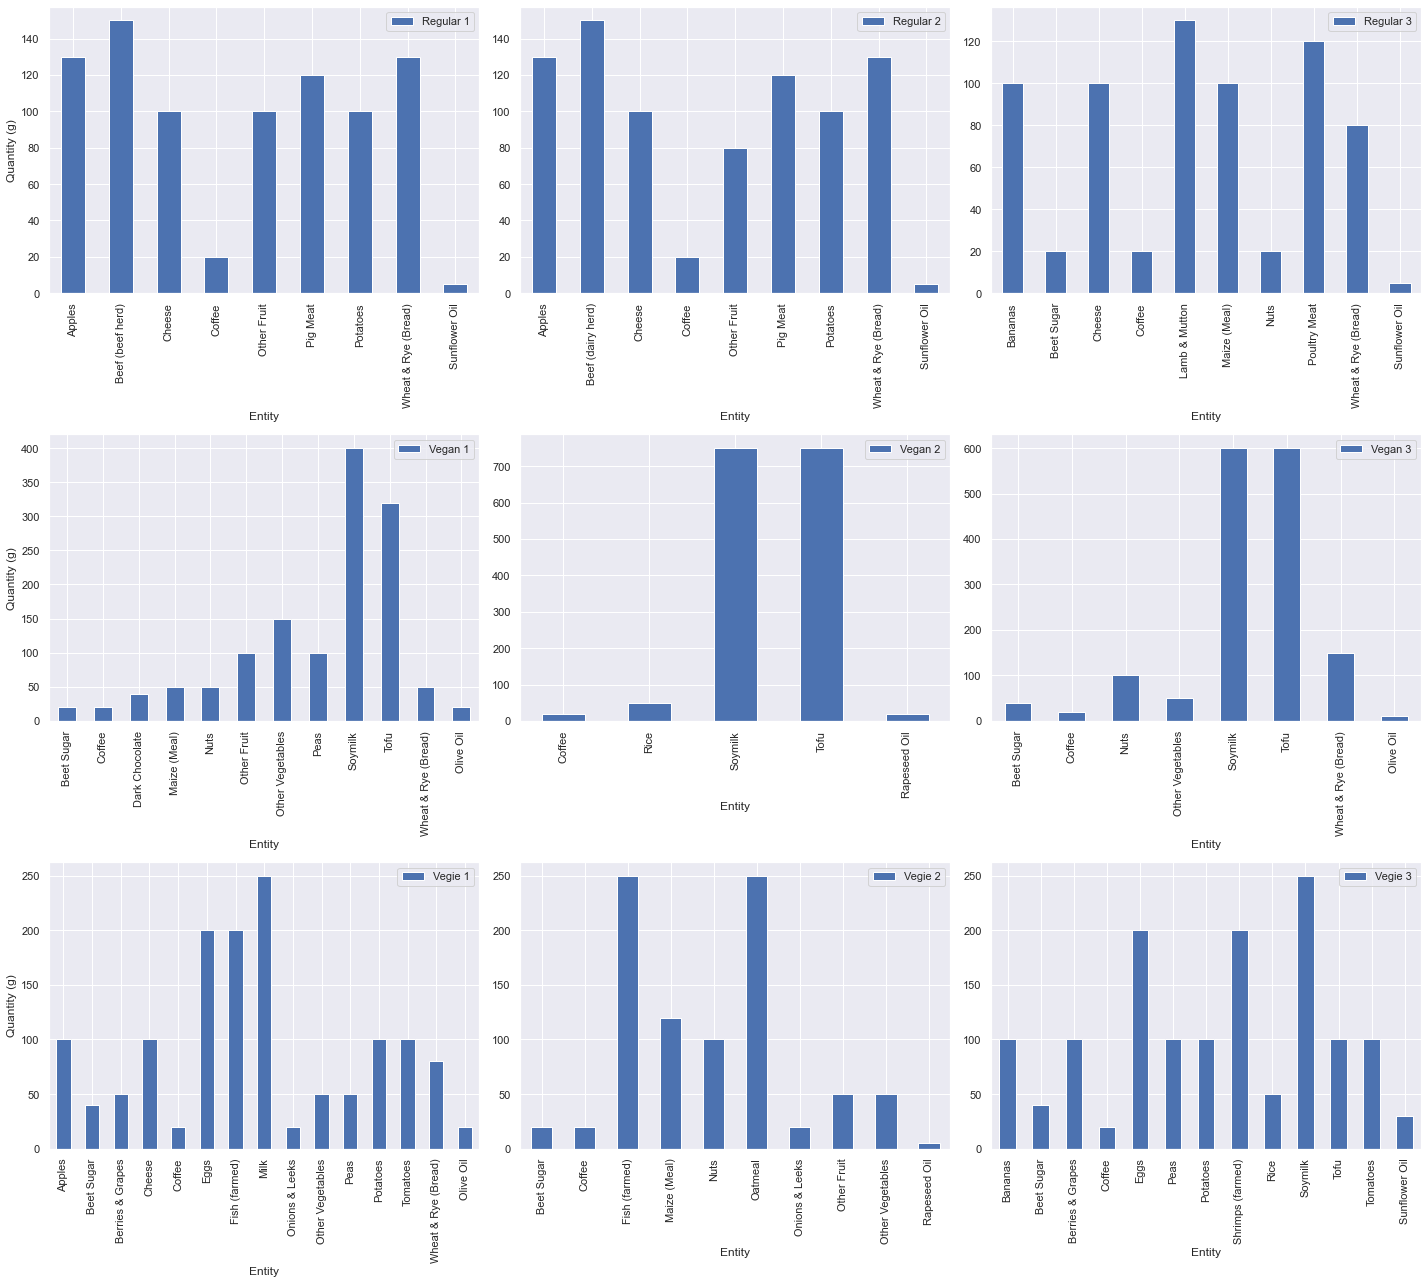

In [26]:
fig, [(axes0, axes1, axes2), (axes3, axes4, axes5), (axes6, axes7, axes8)] = plt.subplots(nrows = 3, ncols = 3, figsize=(20,18))

MealPlan.loc[MealPlan['Regular 1']!=0, 'Regular 1'].plot(kind='bar', ax=axes0)
MealPlan.loc[MealPlan['Regular 2']!=0, 'Regular 2'].plot(kind='bar', ax=axes1)
MealPlan.loc[MealPlan['Regular 3']!=0, 'Regular 3'].plot(kind='bar', ax=axes2)

MealPlan.loc[MealPlan['Vegan 1']!=0, 'Vegan 1'].plot(kind='bar', ax=axes3)
MealPlan.loc[MealPlan['Vegan 2']!=0, 'Vegan 2'].plot(kind='bar', ax=axes4)
MealPlan.loc[MealPlan['Vegan 3']!=0, 'Vegan 3'].plot(kind='bar', ax=axes5)

MealPlan.loc[MealPlan['Vegie 1']!=0, 'Vegie 1'].plot(kind='bar', ax=axes6)
MealPlan.loc[MealPlan['Vegie 2']!=0, 'Vegie 2'].plot(kind='bar', ax=axes7)
MealPlan.loc[MealPlan['Vegie 3']!=0, 'Vegie 3'].plot(kind='bar', ax=axes8)

axes0.legend(['Regular 1'])
axes1.legend(['Regular 2'])
axes2.legend(['Regular 3'])
axes3.legend(['Vegan 1'])
axes4.legend(['Vegan 2'])
axes5.legend(['Vegan 3'])
axes6.legend(['Vegie 1'])
axes7.legend(['Vegie 2'])
axes8.legend(['Vegie 3'])

axes0.set_ylabel('Quantity (g)')
axes3.set_ylabel('Quantity (g)')
axes6.set_ylabel('Quantity (g)')

fig.tight_layout()
plt.show()


In [20]:
# Merging the meal plan dataframe with the main dataframe.

df = MealPlan.merge(df, how='left', left_on=MealPlan.index, right_on='Food product')

In [19]:
new=Summary.T

# Defining the percentages of protein, fat and carbs in each meal

new['protein%']=new['protein']/(new['protein']+new['fat']+new['carbs'])*100
new['fat%']=new['protein']/(new['fat']+new['fat']+new['carbs'])*100
new['carbs%']=new['protein']/(new['carbs']+new['fat']+new['carbs'])*100

In [21]:
MEAL=[]
for meal in ['Regular 1', 'Regular 2', 'Regular 3', 'Vegan 1', 'Vegan 2', 'Vegan 3', 'Vegie 1', 'Vegie 2', 'Vegie 3']:
    
    MEAL.append(sum(df[meal]*df['Total_emissions']/1000))
    MEAL.append(sum(df[meal]*df['Eutrophying emissions per kilogram (gPO₄eq per kilogram)']/1000))   
    MEAL.append(sum(df[meal]*df['Freshwater withdrawals per kilogram (liters per kilogram)']/1000))   
    MEAL.append(sum(df[meal]*df['Land use per kilogram (m² per kilogram)']/1000))

def groupp(l, size):   
    return [l[i:i+size] for i in range(0, len(l), size)]

Bmeal = groupp(MEAL, 4)
result_new = pd.DataFrame(Bmeal, columns=['Em','Eu', 'Wa', 'La'])
result_new.index = ['Regular 1', 'Regular 2', 'Regular 3', 'Vegan 1', 'Vegan 2', 'Vegan 3', 'Vegie 1', 'Vegie 2', 'Vegie 3']

In [22]:
new = new.merge(result_new, how='left', right_on=new.index, left_on=result_new.index)

In [23]:
new['Em_p']=new['Em']*new['protein%']/100
new['Em_f']=new['Em']*new['fat%']/100
new['Em_c']=new['Em']*new['carbs%']/100
new['Eu_p']=new['Eu']*new['protein%']/100
new['Eu_f']=new['Eu']*new['fat%']/100
new['Eu_c']=new['Eu']*new['carbs%']/100
new['Wa_p']=new['Wa']*new['protein%']/100
new['Wa_f']=new['Wa']*new['fat%']/100
new['Wa_c']=new['Wa']*new['carbs%']/100
new['La_p']=new['La']*new['protein%']/100
new['La_f']=new['La']*new['fat%']/100
new['La_c']=new['La']*new['carbs%']/100


In [30]:
new = new.set_index('key_0')

In [34]:
new.index

Index(['Regular 1', 'Regular 2', 'Regular 3', 'Vegan 1', 'Vegan 2', 'Vegan 3',
       'Vegie 1', 'Vegie 2', 'Vegie 3'],
      dtype='object', name='key_0')

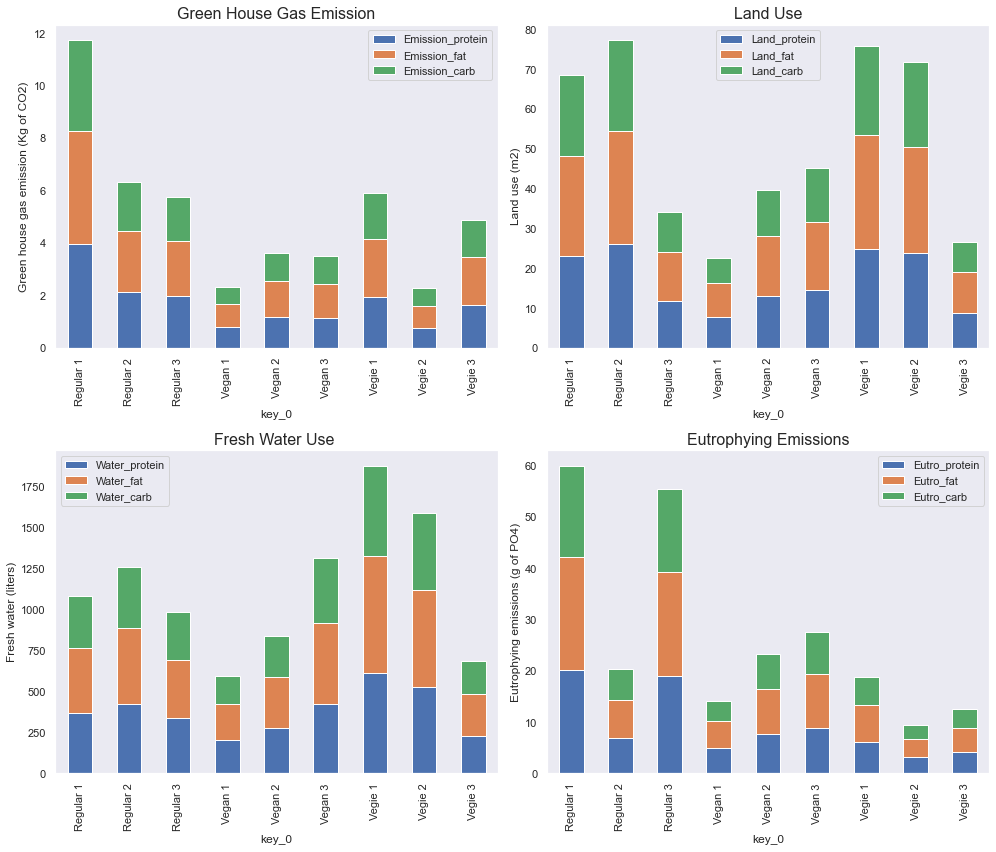

In [37]:

fig, [(axes0, axes1), (axes2, axes3)] = plt.subplots(nrows = 2, ncols = 2, figsize=(14,12))

new.iloc[:,11:14].plot(kind='bar', stacked=True, ax=axes0, grid=False)
new.iloc[:,14:17].plot(kind='bar', stacked=True, ax=axes1, grid=False)
new.iloc[:,17:20].plot(kind='bar', stacked=True, ax=axes2, grid=False)
new.iloc[:,20:23].plot(kind='bar', stacked=True, ax=axes3, grid=False)

axes0.set_title('Green House Gas Emission', fontsize=16)
axes0.legend(['Emission_protein', 'Emission_fat', 'Emission_carb'])
axes0.set_ylabel('Green house gas emission (Kg of CO2)')

axes1.set_title("Land Use", fontsize=16)
axes1.legend(['Land_protein', 'Land_fat', 'Land_carb'])
axes1.set_ylabel('Land use (m2)')

axes2.set_title("Fresh Water Use ", fontsize=16)
axes2.legend(['Water_protein', 'Water_fat', 'Water_carb'])
axes2.set_ylabel('Fresh water (liters)')

axes3.set_title('Eutrophying Emissions', fontsize=16)
axes3.legend(['Eutro_protein', 'Eutro_fat', 'Eutro_carb'])
axes3.set_ylabel('Eutrophying emissions (g of PO4)')

fig.tight_layout()
plt.show()

In all of 4 metrics, vegan meal plans are more environmental friendly. 
Regular 1, has beef (beef herd), cheese and pork as protein sources. Regular 2 is similar to Regular 1 except that the beef is from dairy herd. In Regular 3 poulatry, cheese and lamb are protein sources. Vegie 1, has seefood and dairy products (milk, cheese and egg). Vegie 2 has only seefood and Vegie 3 has seafood and eggs. In all Vegan meal plans, the main source of protein is soy (tofu and/or soy milk) with different combination of hydrocarbons, fruits, vegetables and fat sources.

Green house gas emission: Regular 1 has the highest amount of green house gas emission about 12 Kg CO2, which is significantly higher than Regular 2 (~ 6 Kg CO2). Regular 1 and 2 are similar except that beef in Regular 1 is beef herd. Vegan meal plans have lowest amount of emissions, followed by vegie plans.

Land use: Vegan plans has lower need for area followed by Regular plans and then Vegie plans.

Fresh water use: Vegie 1 (1750 liters) followed by Vegie 2 (1500 liters) and Vegan 3 (1250 liters) have highest demands for water, which is due to the fact that vegetables and tofu and fish which are more frequent is these diets require more water to produce. Therefore, for area where water is scares following a vegan or a vegeterian diet may not be very helpful to the environment.

Eutrophying emissions: Regular 1 and 3 have highest are the most contaminant to the environment. 

The number of meal plans studied here is very limited and it prevents us from making general conclusions. However, it can be infred that while animal food sources are generally recognized as most environmentally destructive choices, such guidlines can be challenged and questioned in extreme and rare conditions such as where water resources are limited.  